In [28]:
# Load data ke dalam data frame 
import pandas as pd

# spesifikasi encoding diperlukan karena data tidak menggunakan UTF-8
df = pd.read_csv('dataset gabungan-270.csv', encoding='latin-1') 

df.head()

,Review,Sentimen
0,Kecewa banget. Saya pesan yang free pouch tapi...,Negatif
1,"Kali ini pengemasan tidak safe,, sepertinya tu...",Negatif
2,paket datangnya barang sudah pecah dan sy retu...,Negatif
3,"ga ada sabun nya, ga sesuai deskripsi",Negatif
4,ga sesuai harapan,Negatif


In [29]:
# Cek jumlah data per kelas
print(df['Sentimen'].value_counts())
print('\n')

# Cek kelengkapan data
print(df.info())
print('\n')

# Cek statistik deskriptif
print(df.describe())

Positif    98
Netral     93
Negatif    79
Name: Sentimen, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    270 non-null    object
 1   Sentimen  270 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB
None


                 Review Sentimen
count               270      270
unique              248        3
top     No review found  Positif
freq                  2       98


In [30]:
# Data untuk label
new_labels = {
    'Negatif' : 0,
    'Netral' : 1,
    'Positif' : 2
}

# Encode label (mengubah label dari spam dan ham menjadi 1 dan 0)
df['Sentimen'] = df['Sentimen'].map(new_labels)

# Cek data teratas
df.head()

,Review,Sentimen
0,Kecewa banget. Saya pesan yang free pouch tapi...,0
1,"Kali ini pengemasan tidak safe,, sepertinya tu...",0
2,paket datangnya barang sudah pecah dan sy retu...,0
3,"ga ada sabun nya, ga sesuai deskripsi",0
4,ga sesuai harapan,0


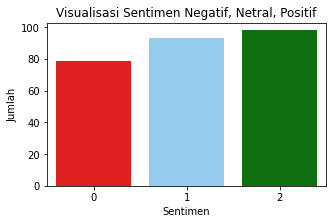

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualisasi sentimen positif, netral, dan negatif
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Sentimen', palette={0: 'red', 1: 'lightskyblue', 2: 'green'})
plt.title('Visualisasi Sentimen Negatif, Netral, Positif')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [32]:
# Memisahkan fitur dengan label
X = df['Review'].values
y = df['Sentimen'].values

In [33]:
# Ekstraksi fitur
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Split data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model
cnb = ComplementNB()

# Inisialisasi TfidfVectorizer
bow = TfidfVectorizer()

# Transformasi seluruh data menggunakan TfidfVectorizer
X_train_transform = bow.fit_transform(X_train)
X_test_transform = bow.transform(X_test)

# Melatih model klasifikasi pada data latih
cnb.fit(X_train_transform, y_train)

# Membuat prediksi pada data uji
predictions_testing = cnb.predict(X_test_transform)

# Membuat prediksi pada data training
predictions_training = cnb.predict(X_train_transform)

In [34]:
# Hitung metrik evaluasi
accuracy_training = accuracy_score(y_train, predictions_training)
precision_training = precision_score(y_train, predictions_training, average='weighted')
recall_training = recall_score(y_train, predictions_training, average='weighted')
f1_training = f1_score(y_train, predictions_training, average='weighted')

# Print hasil
print("------- AKURASI TRAINING -------")
print("Overall accuracy:", accuracy_training)
print("Overall precision:", precision_training)
print("Overall recall:", recall_training)
print("Overall F1-score:", f1_training)

print(f'Confusion Matrix : \n {confusion_matrix(y_train, predictions_training)}')
print('-----------------------------------------------------\n')
print(classification_report(y_train, predictions_training, zero_division=0))


------- AKURASI TRAINING -------
Overall accuracy: 0.9206349206349206
Overall precision: 0.9218678363877427
Overall recall: 0.9206349206349206
Overall F1-score: 0.9203463764560295
Confusion Matrix : 
 [[57  1  0]
 [ 1 56  9]
 [ 0  4 61]]
-----------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.92      0.85      0.88        66
           2       0.87      0.94      0.90        65

    accuracy                           0.92       189
   macro avg       0.92      0.92      0.92       189
weighted avg       0.92      0.92      0.92       189



In [35]:
# Hitung metrik evaluasi
accuracy_testing = accuracy_score(y_test, predictions_testing)
precision_testing = precision_score(y_test, predictions_testing, average='weighted')
recall_testing = recall_score(y_test, predictions_testing, average='weighted')
f1_testing = f1_score(y_test, predictions_testing, average='weighted')

# Print hasil
print("------- AKURASI TESTING -------")
print("Overall accuracy:", accuracy_testing)
print("Overall precision:", precision_testing)
print("Overall recall:", recall_testing)
print("Overall F1-score:", f1_testing)

print(f'Confusion Matrix : \n {confusion_matrix(y_test, predictions_testing)}')
print('-----------------------------------------------------\n')
print(classification_report(y_test, predictions_testing, zero_division=0))

------- AKURASI TESTING -------
Overall accuracy: 0.5432098765432098
Overall precision: 0.5499338624338624
Overall recall: 0.5432098765432098
Overall F1-score: 0.5316917464660283
Confusion Matrix : 
 [[15  2  4]
 [ 7  9 11]
 [ 8  5 20]]
-----------------------------------------------------

              precision    recall  f1-score   support

           0       0.50      0.71      0.59        21
           1       0.56      0.33      0.42        27
           2       0.57      0.61      0.59        33

    accuracy                           0.54        81
   macro avg       0.54      0.55      0.53        81
weighted avg       0.55      0.54      0.53        81



In [36]:
new_text = input("\nMasukkan teks baru: ")
new_text_vec = bow.transform([new_text])
predicted_sentimen = cnb.predict(new_text_vec)

if predicted_sentimen[0] == 0:
    sentiment_label = "negatif"
elif predicted_sentimen[0] == 1:
    sentiment_label = "netral"
elif predicted_sentimen[0] == 2:
    sentiment_label = "positif"

print("Hasil Analisis Sentimen untuk Teks Baru : ", sentiment_label)

Hasil Analisis Sentimen untuk Teks Baru :  positif
